# **ASSIGNMENT 11**
Dzaky Raihan Ahmad

1301204316

- Buatlah visualisasi jaringan yang merepresentasikan jalur transportasi yang menghubungkan kota-kota besar di Jawa Barat.

- Tentukan kota terpenting berdasarkan nilai degree centrality dan betweenness centrality.

- Update ukuran node berdasarkan nilai degree centrality

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

import warnings
warnings.filterwarnings("ignore")

In [3]:
trayek = pd.read_csv('trayek.csv')
trayek

,from,to
0,Kota Bandung,Kota Banjar
1,Kota Bandung,Kota Bogor
2,Kota Bandung,Kota Cimahi
3,Kota Bandung,Kota Cirebon
4,Kota Bandung,Kota Tasikmalaya
5,Kota Banjar,Kota Sukabumi
6,Kota Bekasi,Kota Bandung
7,Kota Bogor,Kota Bandung
8,Kota Bogor,Kota Bekasi
9,Kota Bogor,Kota Cirebon


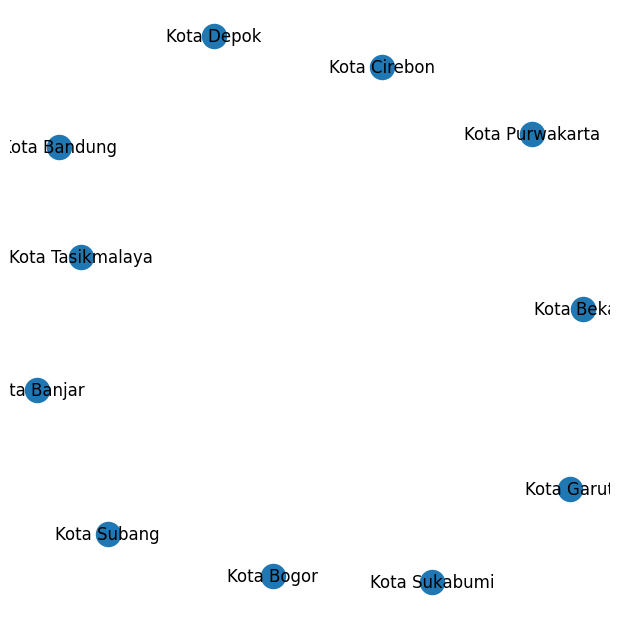

In [10]:
G = nx.Graph()
G.add_nodes_from(trayek['from'])
G.nodes()
fig = plt.figure(1, figsize=(6, 6))
nx.draw(G, with_labels=True, font_weight='light')
plt.show()

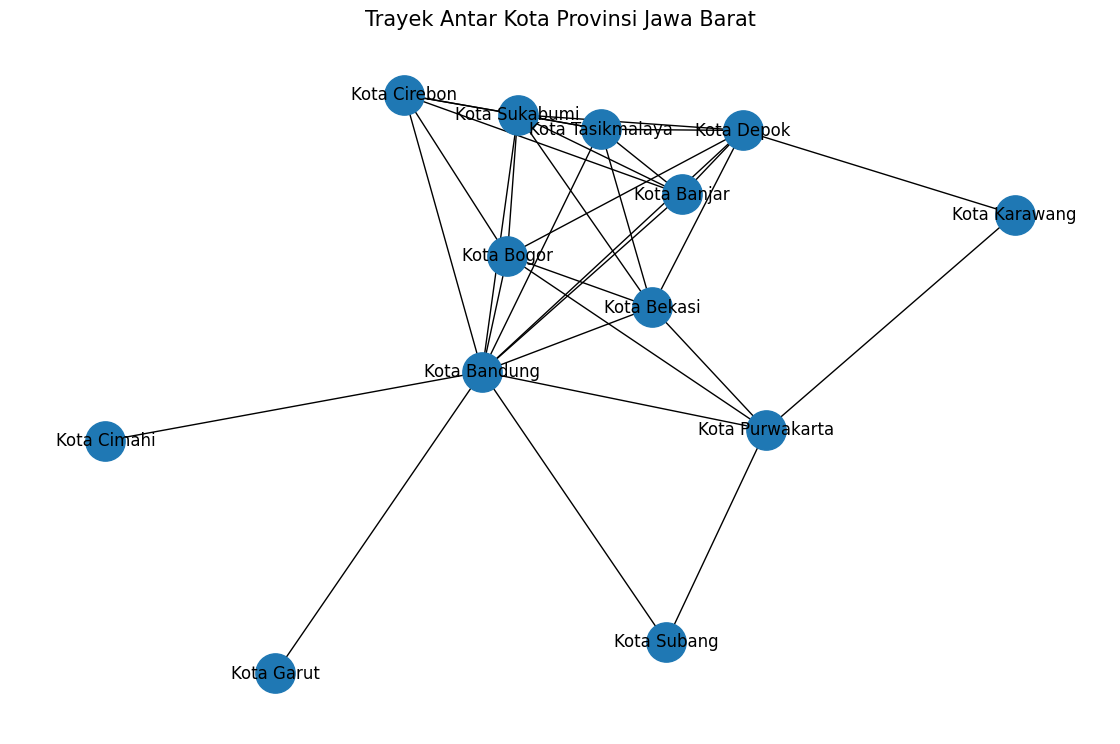

In [13]:
graph = nx.from_pandas_edgelist(trayek, source ="from", target = "to")
type(graph)

plt.figure(1,figsize=(11,7))
pos=nx.spring_layout(graph,iterations=20)
nx.draw(graph, node_size=800, font_size=12, pos=pos, with_labels=True)
plt.title("Trayek Antar Kota Provinsi Jawa Barat", size=15)
plt.show()

# DEGREE CENTRALITY

In [15]:
degree = nx.degree_centrality(graph)

degreedf = pd.DataFrame(sorted(degree.items(), reverse=True), columns=['Kota', 'Nilai Degree'])
degreedf

,Kota,Nilai Degree
0,Kota Tasikmalaya,0.500000
1,Kota Sukabumi,0.583333
2,Kota Subang,0.166667
3,Kota Purwakarta,0.416667
4,Kota Karawang,0.166667
5,Kota Garut,0.083333
6,Kota Depok,0.583333
7,Kota Cirebon,0.416667
8,Kota Cimahi,0.083333
9,Kota Bogor,0.500000


13


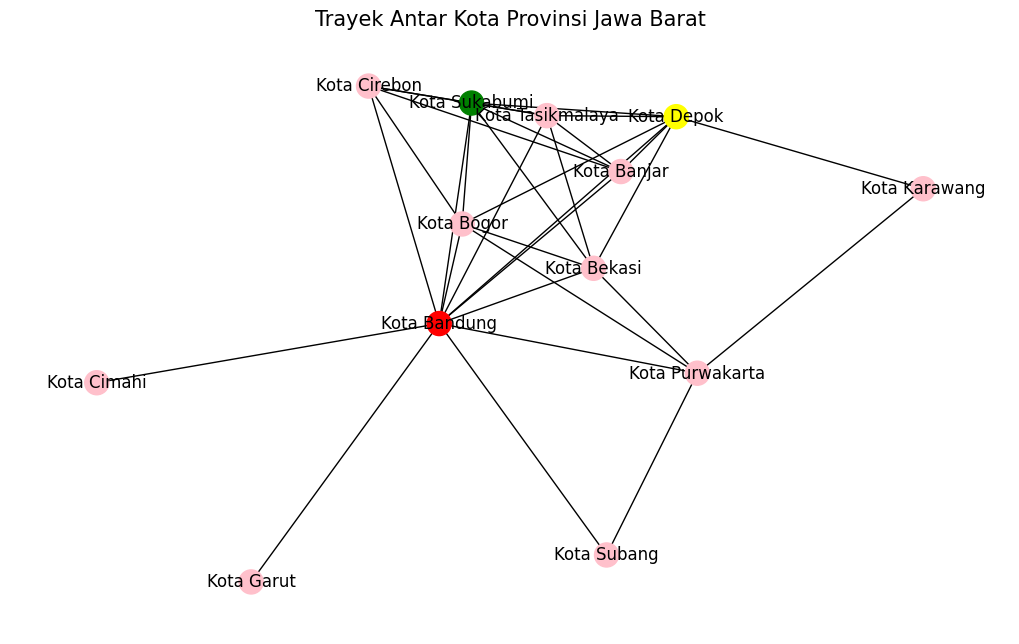

In [16]:
degree = nx.degree_centrality(graph)
sortedcD = sorted(degree.items(), key=lambda kv: kv[1])
sortedcD.reverse()
print(len(sortedcD))

colors = []
for node in graph:
    if node in sortedcD[0]:
        colors.append('red')
    elif node in sortedcD[1]:
        colors.append('yellow')
    elif node in sortedcD[2]:
        colors.append('green')
    else:
        colors.append('pink')

fig = plt.figure(figsize=(10,6))
nx.draw(graph,pos, with_labels = 'true',node_color = colors)
plt.title("Trayek Antar Kota Provinsi Jawa Barat", size=15)
plt.show()

# BETWEENESS CENTRALITY

In [17]:
beetwenness = nx.betweenness_centrality(graph)

betweeness = pd.DataFrame(sorted(beetwenness.items(), reverse=True), columns=['Kota', 'Nilai'])
betweeness

,Kota,Nilai
0,Kota Tasikmalaya,0.012771
1,Kota Sukabumi,0.019589
2,Kota Subang,0.000000
3,Kota Purwakarta,0.072511
4,Kota Karawang,0.003788
5,Kota Garut,0.000000
6,Kota Depok,0.104762
7,Kota Cirebon,0.006818
8,Kota Cimahi,0.000000
9,Kota Bogor,0.027561


13


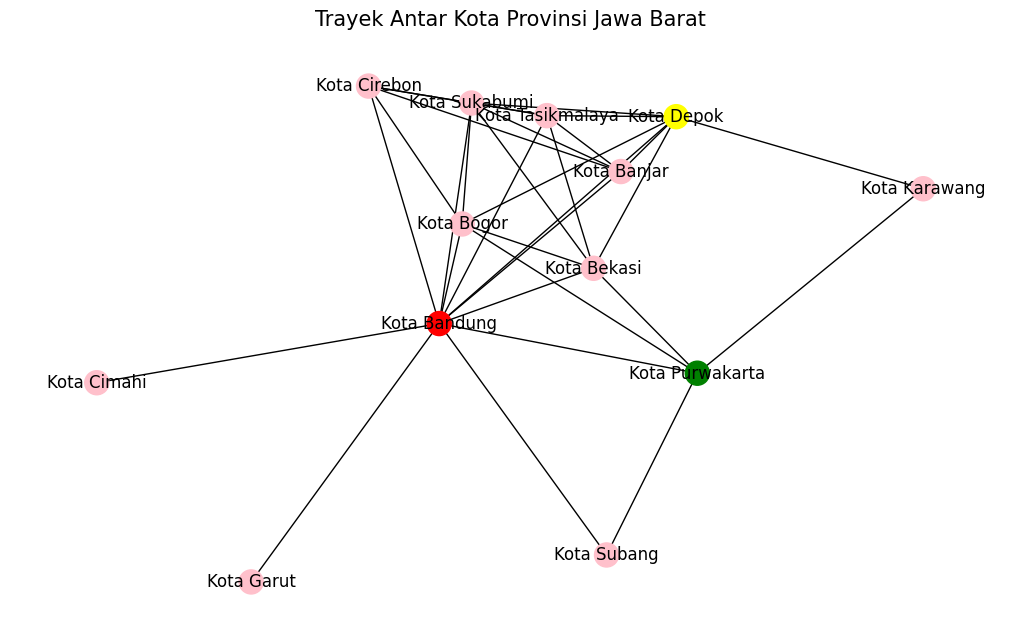

In [18]:
sortedcB = sorted(beetwenness.items(), key=lambda kv: kv[1])
sortedcB.reverse()
print(len(sortedcB))

colors = []
for node in graph:
    if node in sortedcB[0]:
        colors.append('red')
    elif node in sortedcB[1]:
        colors.append('yellow')
    elif node in sortedcB[2]:
        colors.append('green')
    else:
        colors.append('pink')

fig = plt.figure(figsize=(10,6))
nx.draw(graph,pos, with_labels = 'true',node_color = colors)
plt.title("Trayek Antar Kota Provinsi Jawa Barat", size=15)
plt.show()

# Kesimpulan

Dapat ditarik kesimpulan bahwa Kota terpenting berdasarkan Degree Centrality dan Betweeness Centrality adalah Kota Bandung yang diperoleh dari perolehan nilai Degree Centrality dari besar adalah Kota Bandung, Kota Depok, Kota Sukabumi, kemudian nilai Beetweeness Centrality adalah Kota Bandung, Kota Depok, dan Kota Purwakarta